In [1]:
#!pip install pyyaml

In [2]:
import json
import os
import glob
import shutil
import yaml

In [3]:
dataset_path = "객체/"
save_path = "park_objects/"
images_save_path = save_path + 'images/'
labels_save_path = save_path + 'labels/'
jsons_save_path = save_path + 'jsons/'

In [10]:
# os.mkdir(save_path)
# os.mkdir(images_save_path)
# os.mkdir(labels_save_path)
# os.mkdir(jsons_save_path)

In [4]:
directoryNames = os.listdir(dataset_path)

In [ ]:
# ._디렉토리 지우기
#rm -rf ._*

In [10]:
park_jsons = os.listdir('park_objects/jsons/')

### Image resolution, width and height

In [21]:
for park_json_path in park_jsons:
    with open(jsons_save_path + park_json_path) as f:
        park_json = json.load(f)
        #print(park_json)
        #print(park_json.keys())
        height = park_json['images']['height']
        width = park_json['images']['width']
        if height != 1080 and width != 1920:
            print(height, width)
            print('not FHD')

### Label name list

In [ ]:
object_set = set()

for park_json_path in park_jsons:
    with open(jsons_save_path + park_json_path) as f:
        park_json = json.load(f)
    for label in park_json['category']:
        object_set.add(label['object_class_name'])

object_list = list(object_set)
object_list.sort()
print(object_list)
len(object_list)

In [ ]:
object_list = ['banner', 'bench', 'fence', 'garbage_bag', 
               'park_headstone', 'park_info', 'park_pot', 'pet', 
               'rest_area', 'street_lamp', 'tent', 'toilet', 'trash_can']

### Class distribution

In [77]:
object_dict = {'banner': 0, 'bench': 0, 'fence': 0, 'garbage_bag': 0, 
               'park_headstone': 0, 'park_info': 0, 'park_pot': 0, 'pet': 0,
               'rest_area': 0, 'street_lamp': 0, 'tent': 0, 'toilet': 0, 'trash_can': 0}

In [78]:
for park_json_path in park_jsons:
    with open(jsons_save_path + park_json_path) as f:
        park_json = json.load(f)
        #print(park_json)
        #print(park_json.keys())
        annotations = park_json['annotations']
        for annotation in annotations:
            if annotation['object_class'] not in object_dict.keys():
                continue
            elif annotation['object_class'] in object_dict.keys():
                object_dict[annotation['object_class']] += 1

In [36]:
# !pip install seaborn

     |████████████████████████████████| 292 kB 27.6 MB/s eta 0:00:01
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl (9.5 MB)
     |████████████████████████████████| 503 kB 88.8 MB/s eta 0:00:01


In [80]:
object_dict

{'banner': 1769,
 'bench': 4084,
 'fence': 2800,
 'garbage_bag': 1234,
 'park_headstone': 1498,
 'park_info': 1999,
 'park_pot': 2498,
 'pet': 1173,
 'rest_area': 1209,
 'street_lamp': 2582,
 'tent': 1897,
 'toilet': 951,
 'trash_can': 1650}

In [81]:
import operator

In [82]:
sorted_object_dict = dict(sorted(object_dict.items(), key=operator.itemgetter(1)))

In [83]:
print(sorted_object_dict)

{'toilet': 951, 'pet': 1173, 'rest_area': 1209, 'garbage_bag': 1234, 'park_headstone': 1498, 'trash_can': 1650, 'banner': 1769, 'tent': 1897, 'park_info': 1999, 'park_pot': 2498, 'street_lamp': 2582, 'fence': 2800, 'bench': 4084}


In [84]:
import seaborn as sns

<AxesSubplot:>

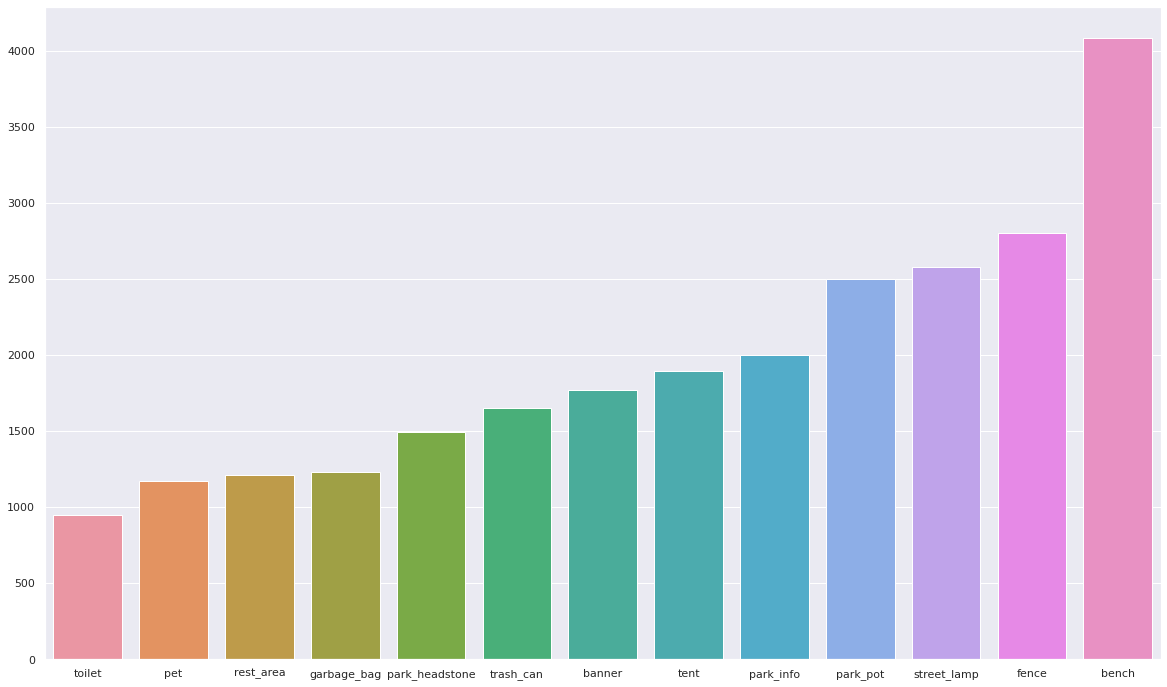

In [85]:
keys = list(sorted_object_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = list(sorted_object_dict.values())
sns.set(rc = {'figure.figsize':(20,12)})
sns.barplot(x=keys, y=vals)

In [ ]:
def label_distribution(json_path):
    # open json file
    with open(jsons_save_path + json_path) as f:
        selectstar_json = json.load(f)
    
    
    # save file
    f = open(label_file_path, 'w')
    image_w = selectstar_json['images']['width']
    image_h = selectstar_json['images']['height']
    
    # coordinate scaling
    for champ_dict in selectstar_json['annotations']:
        champion_name = champ_dict['object_class']
        
        if champion_name not in object_list:
            continue
            
        x = abs((champ_dict['bbox'][0][0] + champ_dict['bbox'][1][0])/2)/image_w
        y = abs((champ_dict['bbox'][0][1] + champ_dict['bbox'][1][1])/2)/image_h
        w = abs(champ_dict['bbox'][0][0] - champ_dict['bbox'][1][0])/image_w
        h = abs(champ_dict['bbox'][0][1] - champ_dict['bbox'][1][1])/image_h
#         print(champion_name, x, y ,w, h)
        
        # champion_name to champion_number
        f.write(' '.join(map(str, [object_list.index(champion_name), x, y, w, h])) + '\n')
    f.close()